In [24]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 17 13:36:40 2020

@author: bless
"""


import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

# Load data into H2O

df= h2o.upload_file("C:/Users/bless/OneDrive/Documents/TrendingVirus/Final_Project_dataset_V4.csv")


df.head()

print(f'Size of training set: {df.shape[0]} rows and {df.shape[1]} columns')


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 hour 52 mins
H2O cluster timezone:,America/Toronto
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_bless_h4cef4
H2O cluster total nodes:,1
H2O cluster free memory:,15.92 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Size of training set: 2439 rows and 15 columns


In [25]:
df.types

{'Date of notification to WHO (yyyy/mm/dd)': 'time',
 'Reporting country': 'enum',
 'City of residence': 'enum',
 'Age': 'int',
 'Sex': 'enum',
 'Health care worker': 'enum',
 'Comorbidities': 'enum',
 'Exposure to camels': 'enum',
 'Camel milk consumption': 'enum',
 'Exposure to MERS-CoV cases': 'enum',
 'Date of symptoms onset (yyyy/mm/dd)': 'time',
 'Date of first hospitalization (yyyy/mm/dd)': 'time',
 'Date of laboratory confirmation (yyyy/mm/dd)': 'time',
 'Day_diff': 'int',
 'target': 'enum'}

In [27]:

splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]



y = "target" 
x = df.columns

x.remove(y)



In [28]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)
 

lb = aml.leaderboard
lb.head()


AutoML progress: |
16:24:38.580: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_20200217_162438,0.997329,0.061141,0.764704,0.0212508,0.127965,0.016375
GBM_4_AutoML_20200217_162438,0.996957,0.06082,0.980217,0.0146718,0.124909,0.0156024
GBM_grid__1_AutoML_20200217_162438_model_7,0.996938,0.0575698,0.966226,0.0140839,0.124277,0.0154448
GBM_grid__1_AutoML_20200217_162438_model_3,0.99661,0.0613864,0.986165,0.0154913,0.128042,0.0163949
StackedEnsemble_BestOfFamily_AutoML_20200217_162438,0.996183,0.0645667,0.984265,0.0134912,0.128805,0.0165907
GBM_2_AutoML_20200217_162438,0.996078,0.061601,0.98428,0.0150237,0.126745,0.0160644
GBM_1_AutoML_20200217_162438,0.996067,0.0628338,0.977311,0.0150237,0.127218,0.0161843
GBM_grid__1_AutoML_20200217_162438_model_5,0.995915,0.0630186,0.977466,0.013732,0.127904,0.0163594
StackedEnsemble_AllModels_AutoML_20200217_162438,0.995889,0.0655996,0.977,0.0186674,0.128141,0.01642
GBM_grid__1_AutoML_20200217_162438_model_1,0.99587,0.0624506,0.985202,0.0146718,0.126751,0.0160658


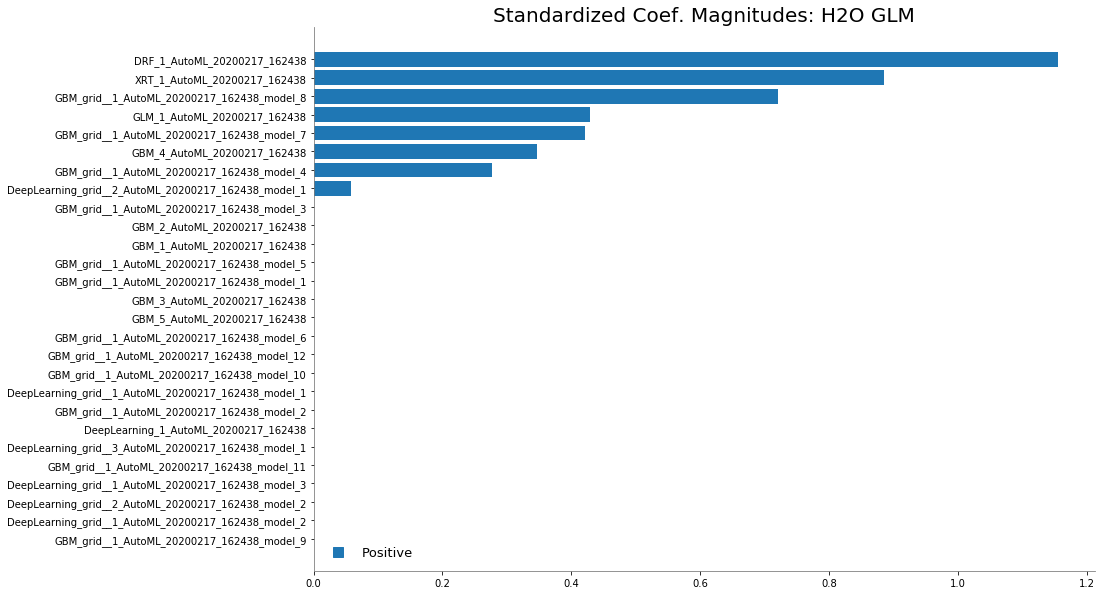

drf prediction progress: |████████████████████████████████████████████████| 100%


'C:\\Users\\bless\\product_backorders_model_bin\\DRF_1_AutoML_20200217_162438'

In [29]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

%matplotlib inline
metalearner.std_coef_plot()



pred = aml.predict(test)
pred.head()


h2o.save_model(aml.leader, path="./product_backorders_model_bin")


In [30]:
pred.head()

predict,Alive,Dead
Dead,0.214127,0.785873
Alive,1,0
Alive,0.977273,0.0227273
Alive,1,0
Alive,0.988194,0.0118064
Alive,0.993113,0.00688705
Alive,1,0
Alive,0.695851,0.304149
Dead,0.0336396,0.96636
Alive,1,0
